# Sleep Disorder Data Analysis and Prediction
This project is to explore a dataset for people's sleep disorders that include Sleep Apnea and Insomnia, looking at various factors such as their gender, age, occupation, sleep duration/quality, and more.
The dataset is from kaggle.

#### Importing Libraries and setting up environment

In [1]:
#Set up environment
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import os
import numpy as np
import squarify

#Libraries
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report


In [2]:
os.chdir("E:\Data Projects\Sleep data")

#### Loading Data and Renaming Columns/Values

In [3]:
#Loading Data
df= pd.read_csv("sleep_dataset.csv")
display(df)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


There are a total of 374 rows and 13 columns in this dataset; there's only 374 samples.

In [4]:
# Renaming columns 
df= df.rename(columns = {'Person ID':'ID','Sleep Duration' : 'Sleep_Duration' , 'Quality of Sleep': 'Sleep_Quality','Physical Activity Level' : 'PA_Level', 'Stress Level':'Stress',
                     'BMI Category':'BMI_Category', 'Blood Pressure':'Blood_Pressure' , 'Heart Rate':'Heart_Rate',
                     'Daily Steps':'Daily_Steps','Sleep Disorder' : 'Sleep_Disorder'}) #PA Level stands for Physical Activity
df['Sleep_Disorder'] = df['Sleep_Disorder'].replace({"None": 'No Sleep Disorder'})


In [5]:
display(df)

,ID,Gender,Age,Occupation,Sleep_Duration,Sleep_Quality,PA_Level,Stress,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Data Visualizations
#### CountPlots and Histogram

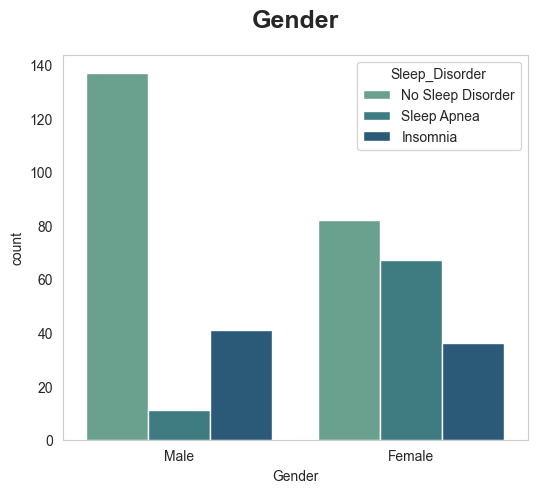

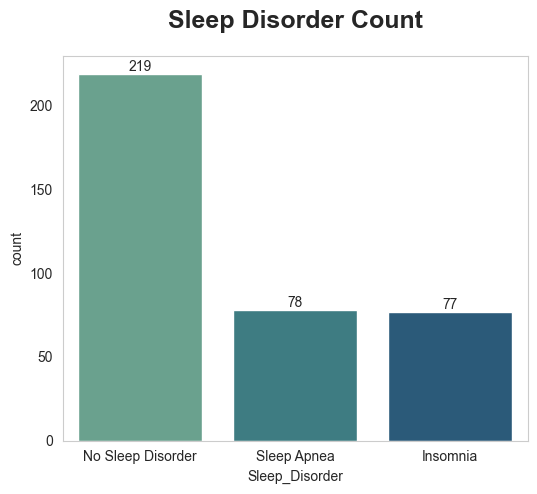

<Figure size 1200x600 with 0 Axes>

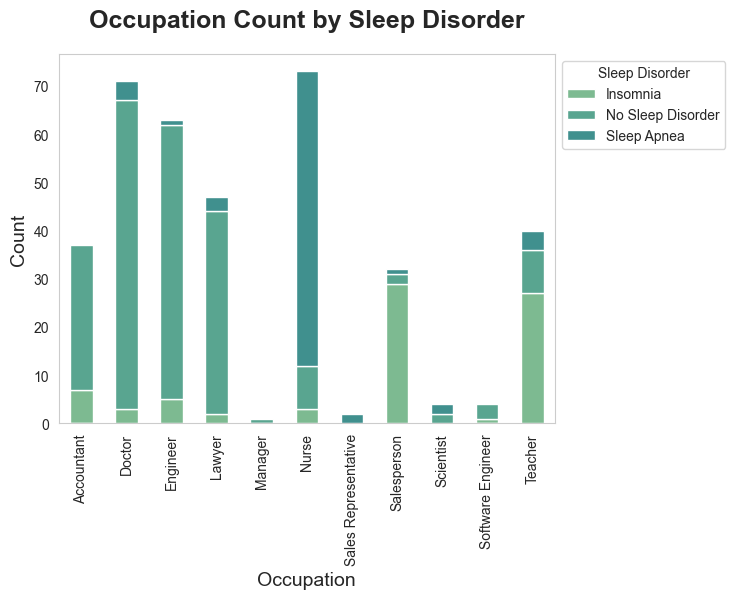

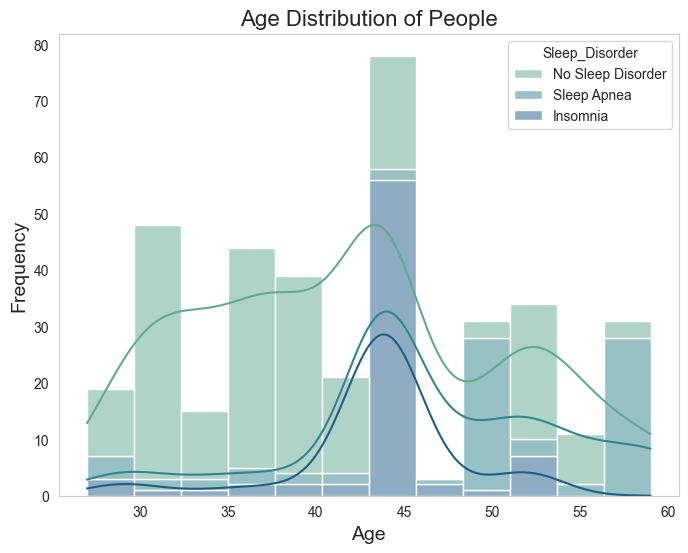

In [11]:
# Step 1: Understand Data better to know we are working with: 
# CountPlot of Gender
plt.figure(figsize=(6, 5))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.countplot(data=df, x='Gender', palette="crest", hue="Sleep_Disorder")
plt.title("Gender", size=18, fontweight="bold", x=0.5, y=1.05)
plt.show()

# CountPlot of Sleep Disorders
plt.figure(figsize=(6, 5))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.countplot(data=df, x='Sleep_Disorder', palette="crest")
plt.title("Sleep Disorder Count", size=18, fontweight="bold", x=0.5, y=1.05)
# Calculate counts
sdcount = df['Sleep_Disorder'].value_counts()
# Annotate bars with counts
for i, count in enumerate(sdcount):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

# Set seaborn color palette to "crest"
sns.set_palette("crest")
# Plotting the countplot with stacked bars for sleep disorders
occupation_sleep_counts = df.groupby(['Occupation', 'Sleep_Disorder']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid", {'axes.grid' : False})
occupation_sleep_counts.plot(kind='bar', stacked=True)
plt.title("Occupation Count by Sleep Disorder", size=18, fontweight="bold", x=0.5, y=1.05)
plt.xlabel("Occupation", size=14)
plt.ylabel("Count", size=14)
plt.xticks(rotation=90)
plt.legend(title="Sleep Disorder", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Age Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x="Age", hue="Sleep_Disorder",multiple="stack", bins=12, palette='crest', kde = True)
plt.title('Age Distribution of People', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

Observations on the countplots: 

Gender: There are more females with sleep apnea, but there are a bit more males that have insomnia. 

Occupation: The top five occupations are Nurse, Doctor, Engineer, Lawyer, and Teacher. Nurses are likely to have Sleep Apnea and Salespeople/Teachers are likely to have insomnia.

Sleep Disorders: There are almost an even amount of people who have Sleep Apnea and Insomnia in this dataset.

Age Distribution: Histogram to visually see the age distribution of our dataset. We can see that people around the age of 45 have insomnia and people around the age of 50 or 60 haev Sleep Apnea.

#### Sleep Disorder Visualizations based on Age Group and Occupation

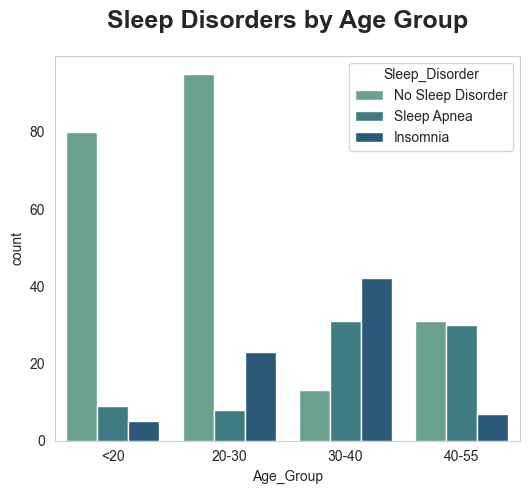

<Figure size 1000x600 with 0 Axes>

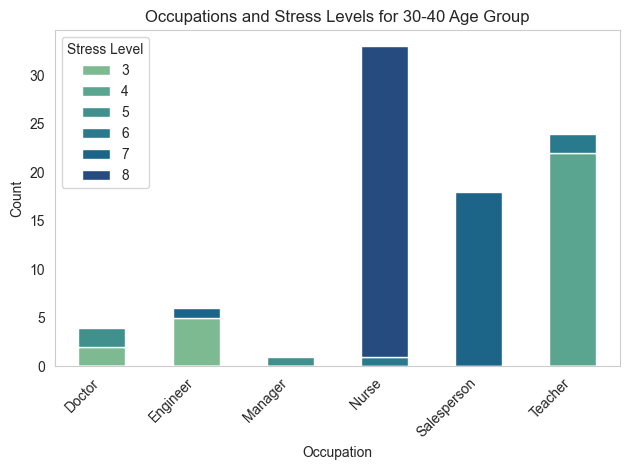

<Figure size 1000x600 with 0 Axes>

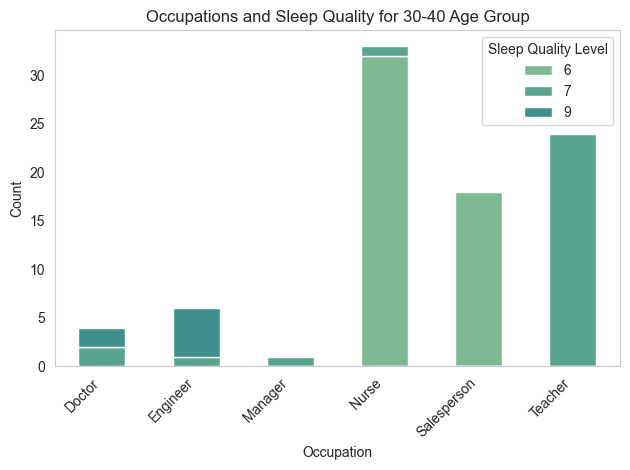

In [12]:
# Creating age group column 
df['Age_Group'] = pd.cut(df['Age'], bins=4, labels=['<20', '20-30', '30-40', '40-55'])
mean_sleep_quality = df.groupby('Age_Group')['Sleep_Quality'].mean().reset_index() 
# CountPlot of Age Group and Sleep Disorder
plt.figure(figsize=(6, 5))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.countplot(data=df, x='Age_Group', palette="crest", hue="Sleep_Disorder")
plt.title("Sleep Disorders by Age Group", size=18, fontweight="bold", x=0.5, y=1.05)
plt.show()

# Filter the DataFrame for the age group 30-40 to analyze age group
df_filtered = df[df['Age_Group'] == '30-40']

# Pivot the DataFrame to have stress levels as columns
pivot_df = df_filtered.groupby(['Occupation', 'Stress']).size().unstack(fill_value=0)
# Set Seaborn's color palette
sns.set_palette("crest")
# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupations and Stress Levels for 30-40 Age Group')
plt.legend(title='Stress Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pivot the DataFrame to have sleep quality levels as columns
pivot_df2 = df_filtered.groupby(['Occupation', 'Sleep_Quality']).size().unstack(fill_value=0)
# Set Seaborn's color palette
sns.set_palette("crest")
# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_df2.plot(kind='bar', stacked=True)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupations and Sleep Quality for 30-40 Age Group')
plt.legend(title='Sleep Quality Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Based on age group, 30-40 age group has the most disorders in comparison to the other age groups.

Looking at the Stacked Bar Charts, we can see the most occupations are Nurse, Salesperson, and Teacher. 
The nurses and Salespeople seem to have a high stress level. They also have the lowest Sleep Quality in comparison to the other occupations

#### Pie Charts for Top Occcupations per Sleep Disorder

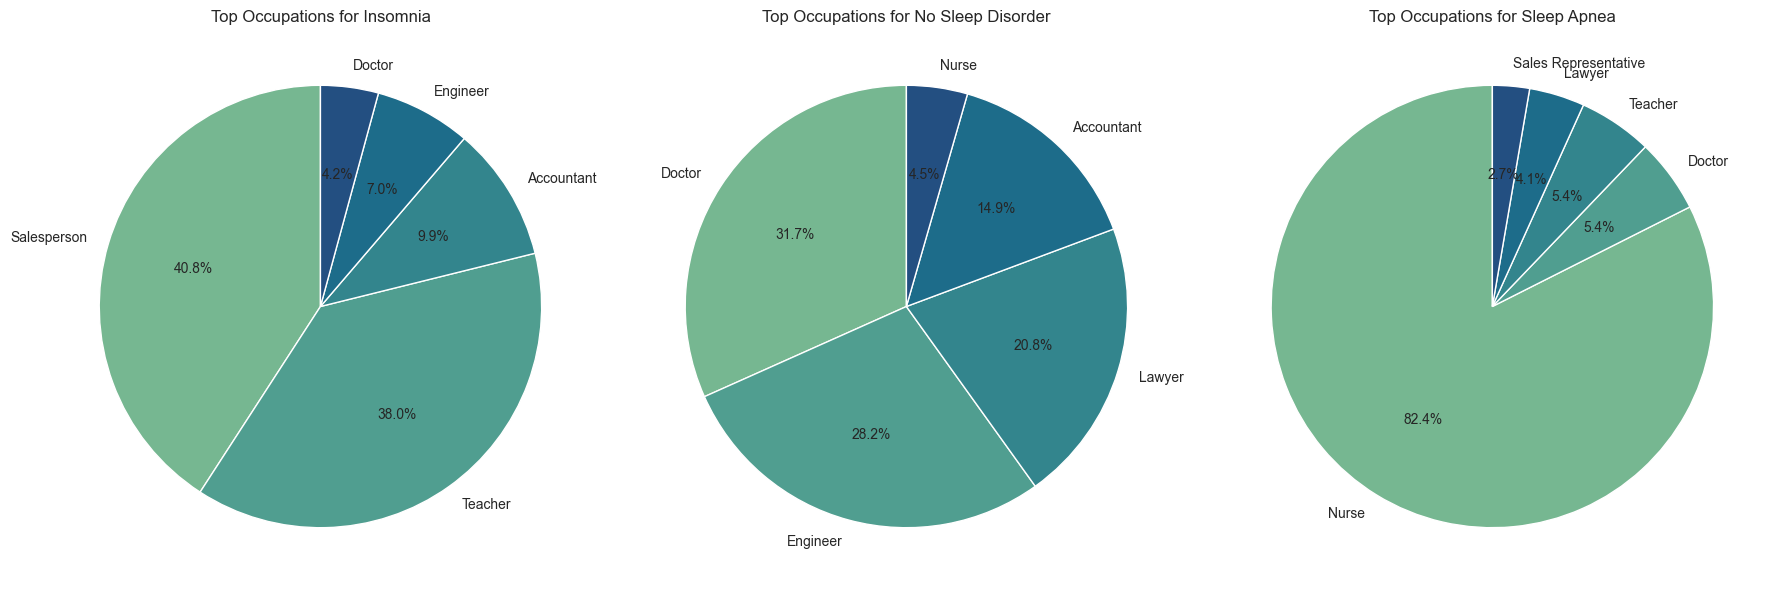

In [13]:
# Group by sleep disorder and occupation, then count occurrences
grouped = df.groupby(['Sleep_Disorder', 'Occupation']).size().reset_index(name='Count')
# Find the top occupations for each sleep disorder
top_occupations_per_disorder = grouped.groupby('Sleep_Disorder').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)
# Set seaborn color palette to "crest"
sns.set_palette("crest", len(top_occupations_per_disorder['Occupation'].unique()))
# Create subplots for all sleep disorder categories in one row
num_disorders = len(top_occupations_per_disorder['Sleep_Disorder'].unique())
fig, axs = plt.subplots(1, num_disorders, figsize=(6 * num_disorders, 6))

for i, (sleep_disorder, group) in enumerate(top_occupations_per_disorder.groupby('Sleep_Disorder')):
    ax = axs[i]
    ax.pie(group['Count'], labels=group['Occupation'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest", len(group)))
    ax.set_title(f"Top Occupations for {sleep_disorder}")

plt.tight_layout()
plt.show()

The general summary of sleep disorders from the pie charts:

Top occupations for Insomnia, Sales person and Teachers are the highest.

Top occupations for No sleep disorders include Doctors and Engineers.

Top Occupation for Sleep Apnea are nurses.

#### Breaking down Occupations for Sleep Disorders by Gender 

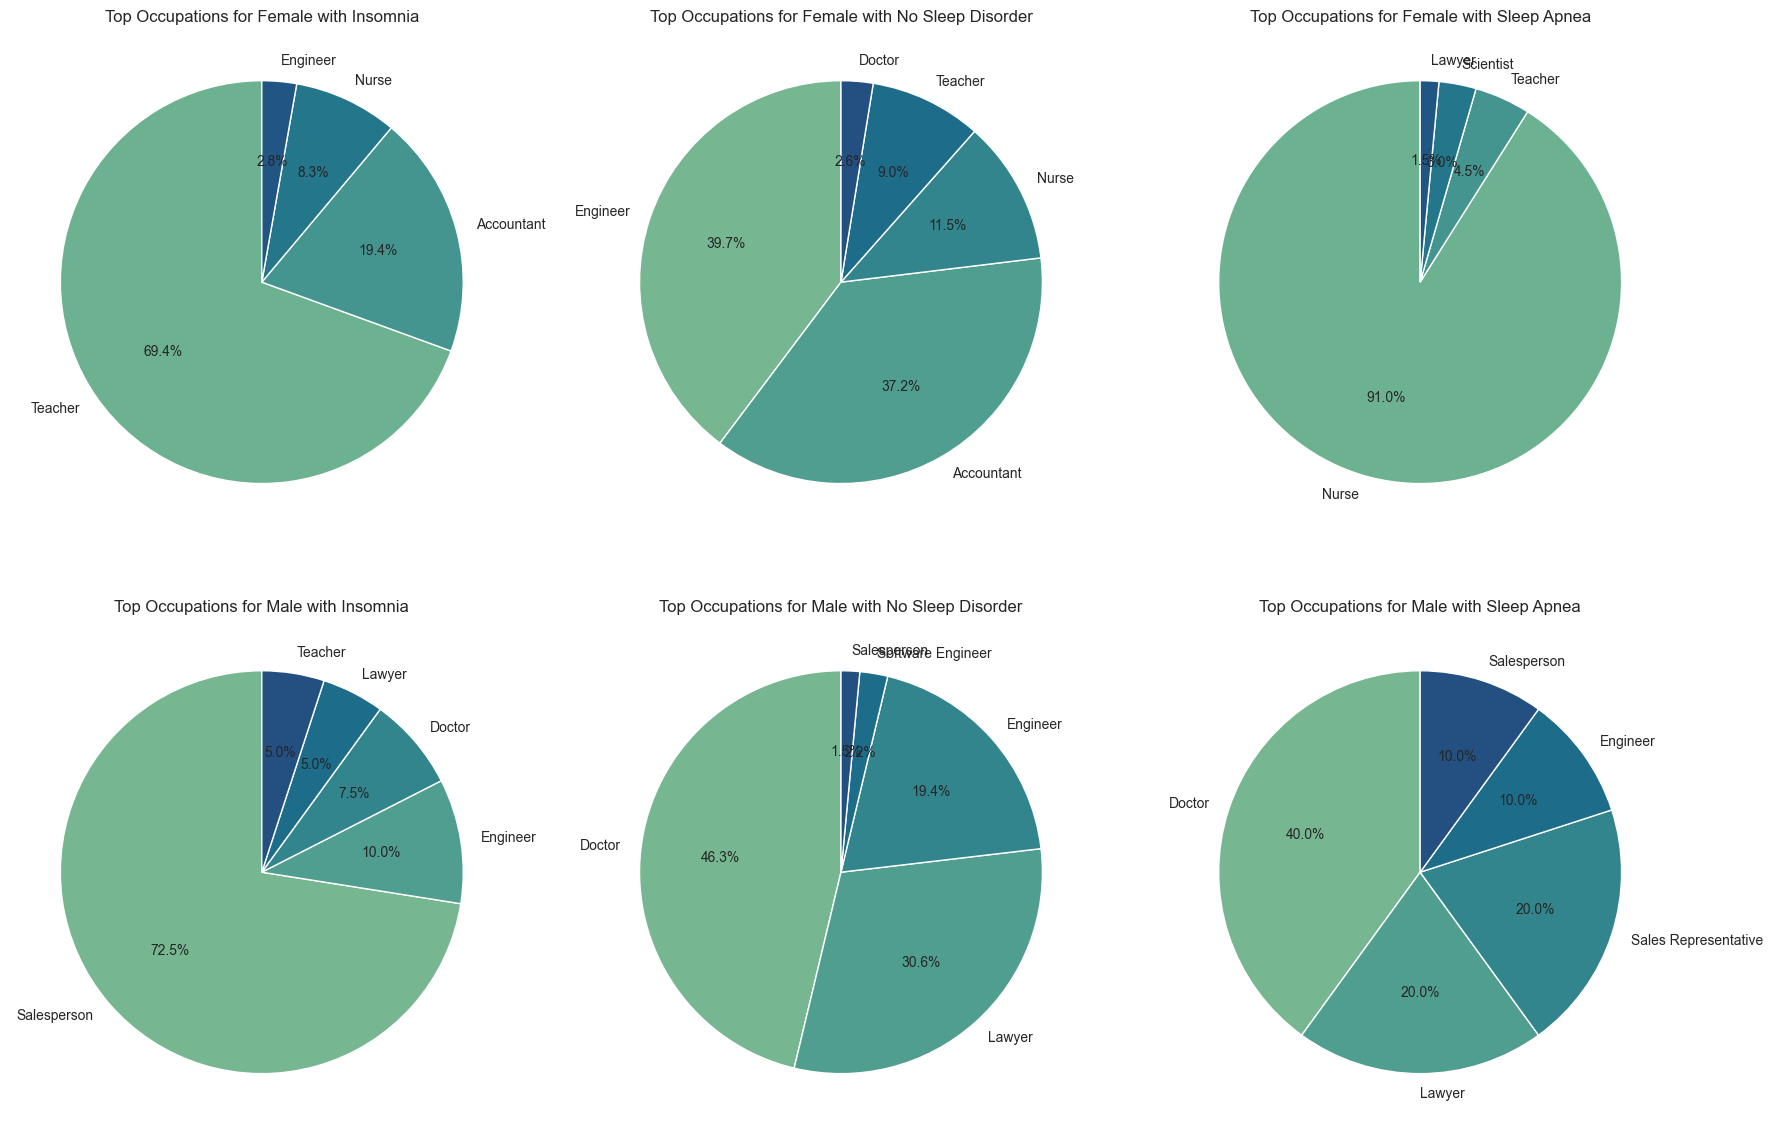

In [14]:
# Group by gender, sleep disorder, and occupation, then count occurrences
grouped_combined = df.groupby(['Gender', 'Sleep_Disorder', 'Occupation']).size().reset_index(name='Count')
# Find the top occupations for each combination of gender and sleep disorder
top_occupations_combined = grouped_combined.groupby(['Gender', 'Sleep_Disorder']).apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)
# Set seaborn color palette to "crest"
sns.set_palette("crest", len(top_occupations_combined['Occupation'].unique()))
# Create subplots for all combinations of gender and sleep disorder
num_plots = len(top_occupations_combined.groupby(['Gender', 'Sleep_Disorder']))
num_cols = 3  # Number of columns per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
for i, (key, group) in enumerate(top_occupations_combined.groupby(['Gender', 'Sleep_Disorder'])):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    gender, sleep_disorder = key
    ax.pie(group['Count'], labels=group['Occupation'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest", len(group)))
    ax.set_title(f"Top Occupations for {gender} with {sleep_disorder}")
# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


For Insomnia, the top occupation for females is teacher and for males is salesperson.

For No sleep disorder, the top occupation for females is Engineer/Accountant and males is doctor/lawyer.

For Sleep Apnea, the top occupation for females is nursing and for males is doctor.

Interesting how different genders have different occupations and it can cause sleep disorders as well.

#### Sleep Quality, Stress, and Sleep Duration V.S. Sleep Disorders Visualizations
To understand Violin Plots, they are used to show the distribution of data by using "violins" to represent different groups or categories, with wider parts indicating more data and narrower parts indicating less. The averages are also calculated to understand the effect on each age group.


Mean Sleep Quality for the following age groups:
Mean Sleep Quality for <20: 6.50
Mean Sleep Quality for 20-30: 7.60
Mean Sleep Quality for 30-40: 6.58
Mean Sleep Quality for 40-55: 8.82

Mean Stress for the following age groups:
Mean Stress for <20: 6.57
Mean Stress for 20-30: 5.04
Mean Stress for 30-40: 6.17
Mean Stress for 40-55: 3.38

Mean Sleep Duration for the following age groups:
Mean Sleep Duration for <20: 6.85
Mean Sleep Duration for 20-30: 7.24
Mean Sleep Duration for 30-40: 6.51
Mean Sleep Duration for 40-55: 8.09


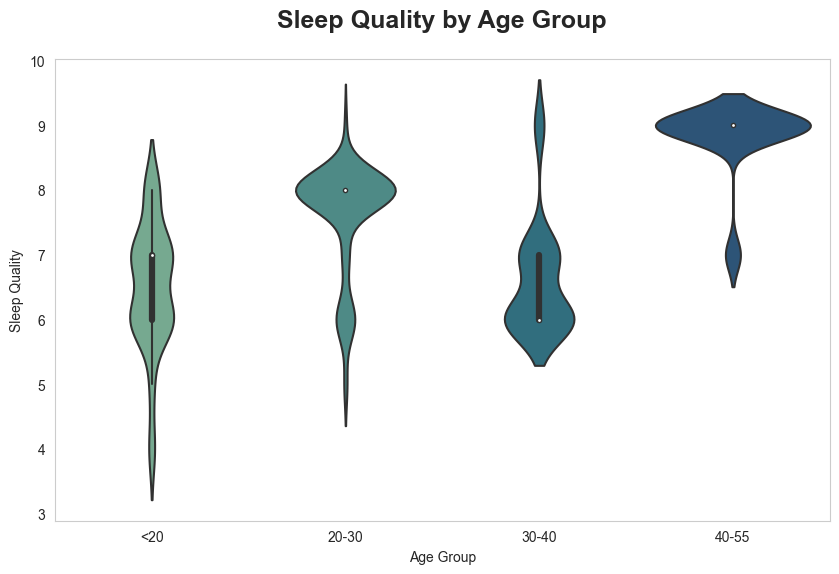

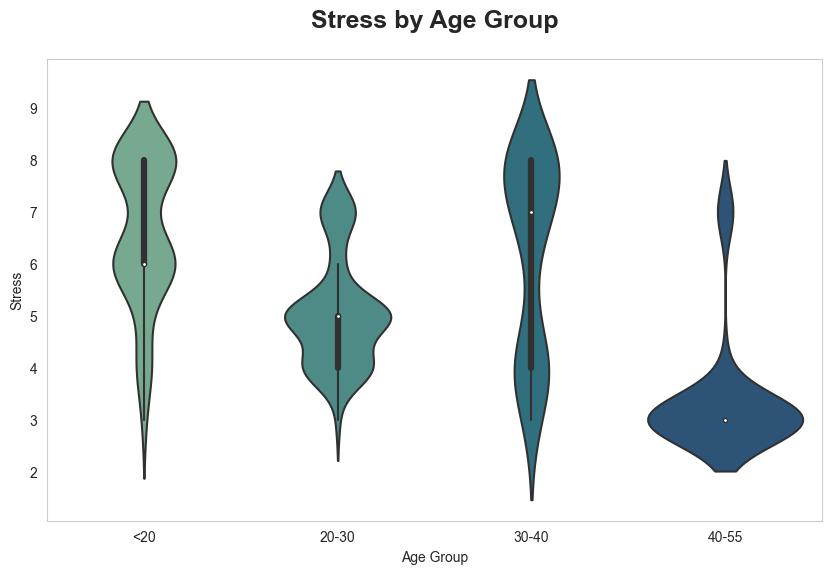

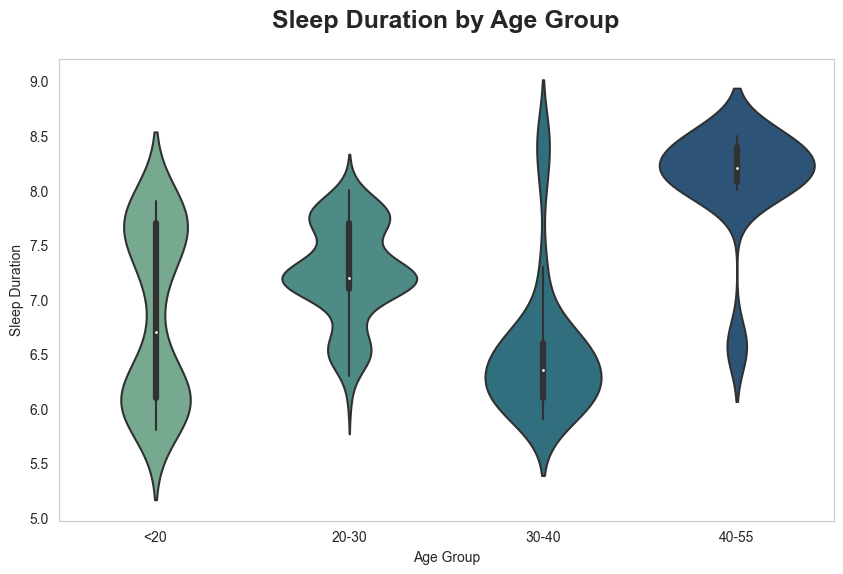

In [15]:
# Violin Plot Visualizations
# List of variables and their corresponding labels for plotting and printing
variables = ['Sleep_Quality', 'Stress', 'Sleep_Duration']
labels = ['Sleep Quality', 'Stress', 'Sleep Duration']

# Loop through each variable
for variable, label in zip(variables, labels):
    # Calculate average values
    average_values = df.groupby('Age_Group')[variable].mean().reset_index()
    
    # Create violin plot
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.violinplot(data=df, x='Age_Group', y=variable, palette="crest")
    plt.title(f"{label} by Age Group", size=18, fontweight="bold", x=0.5, y=1.05)
    plt.xlabel("Age Group")
    plt.ylabel(label)
    
    # Print average values
    print(f"\nMean {label} for the following age groups:")
    for _, row in average_values.iterrows():
        print(f"Mean {label} for {row['Age_Group']}: {row[variable]:.2f}")

plt.show()

General summary of means: 

Average Sleep Quality was lowest for people under 20 y.o. and highest for people 40-55 y.o.

Average Stress was lowest for people 40-55 y.o. and highest for peple under 20 y.o.

Average Sleep duration was  lowest for people 30-40 y.o. and highest for people 40-55 y.o.

Summary of Violin Plots:

The distriubtion of how frequent certain variables (Sleep Quality, Stress, and Sleep Duration) occur for each age group can be seen within the violin plots shown above. A reminder that the wider the violin, there is more data. An example would be for the sleep quality of the age group 30-40, it can be seen that the value 6 occurs more often for this age group since it is widest at this part of the violin. The same applies to 40-55 age group, but there are more people that have the sleep quality of 9.


# Cleaning and Enumerating Data
Categorical data is now put into quantitative values that can be seen for their respected values in the comments of the code.

In [16]:
# Categorize Blood Pressure
def categorize_blood_pressure(bp):
    systolic, diastolic = map(int, bp.split('/'))
    if systolic < 120 and diastolic < 80:
        return 0  # Normal
    elif systolic < 130 and diastolic < 80:
        return 1  # Elevated
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return 2  # Hypertension Stage 1
    else:
        return 3  # Hypertension Stage 2
# Add a new column
df['Blood_Pressure_Category'] = df['Blood_Pressure'].apply(categorize_blood_pressure)

In [17]:
# Categorize BMI 
def enumerate_bmi_category(category):
    if category == 'Overweight':
        return 0
    elif category == 'Normal':
        
        return 1
    elif category == 'Obese':
        return 2
    elif category == 'Normal Weight':
        return 3

# Add a new column 'BMI_category_enum' to the DataFrame with enumerated values
df['BMI_num'] = df['BMI_Category'].apply(enumerate_bmi_category)


In [18]:
#Enumerating Gender Column
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Male' else 1) # Male will be 0, Female will be 1
#Enumerating Occupations
unique_occupations = df['Occupation'].unique()
occupation_mapping = {occupation: idx for idx, occupation in enumerate(unique_occupations)}
df['occupation_enum'] = df['Occupation'].map(occupation_mapping)


In [19]:
#Enumerating Sleep Disorders
def enumerate_sleepdo(category):
    if category == 'No Sleep Disorder':
        return 0
    elif category == 'Sleep Apnea':
        return 1
    elif category == 'Insomnia':
        return 2

# Add a new column 'BMI_category_enum' to the DataFrame with enumerated values
df['SleepDO'] = df['Sleep_Disorder'].apply(enumerate_sleepdo)

# Print the DataFrame with enumerated categories
display(df)


,ID,Gender,Age,Occupation,Sleep_Duration,Sleep_Quality,PA_Level,Stress,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder,Age_Group,Blood_Pressure_Category,BMI_num,occupation_enum,SleepDO
0,1,0,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder,<20,2,0,0,0
1,2,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,<20,2,1,1,0
2,3,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,<20,2,1,1,0
3,4,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,<20,3,2,2,1
4,5,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,<20,3,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,40-55,3,0,4,1
370,371,1,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,40-55,3,0,4,1
371,372,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,40-55,3,0,4,1
372,373,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,40-55,3,0,4,1


#### Correlation HeatMap of enumerated categories 

C:\Users\halan\AppData\Local\Temp\ipykernel_21912\3799174247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


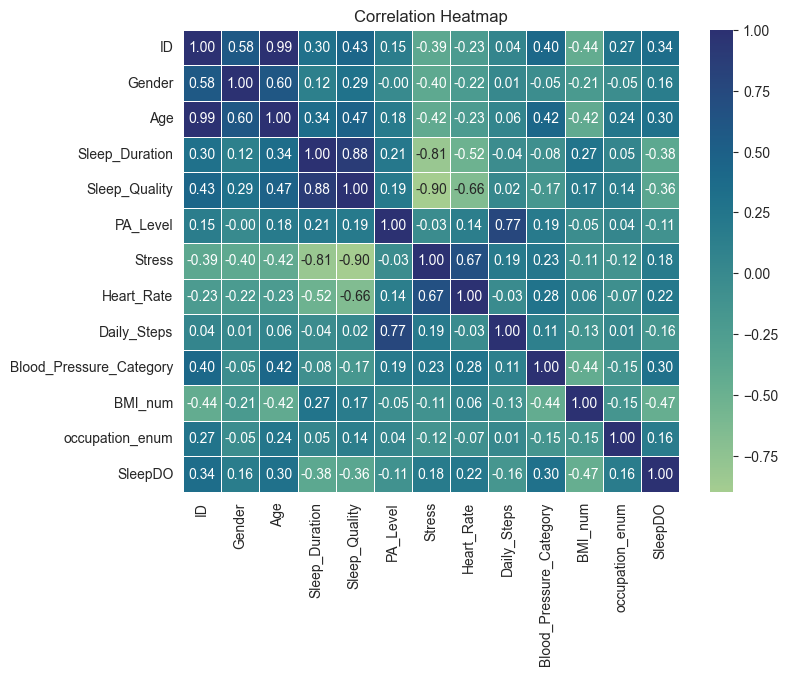

In [20]:
correlation_matrix = df.corr()
# Create the correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Looking at the sleep disorders relationship with other variables, the highest values that have a correlation with sleep disorder can be seen as BMI, Sleep Duration, and Sleep Quality. Surprisingly Stress does not have a strong relationship with Sleep Disorders, along with the occupation.

# Prediction Models
#### Setting up data in training and test sets

In [21]:
x = df[['Gender', 'Age','Sleep_Duration', 'Sleep_Quality',
        'PA_Level','Stress','Heart_Rate','Daily_Steps','Blood_Pressure_Category',
        'BMI_num','occupation_enum']]
y= df['SleepDO']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### Logistic Regression Model

In [22]:

# Train one classifier per class using Logistic Regression with OvR strategy
classifiers = []
for class_label in np.unique(y):
    # Create a binary target variable indicating whether the sample belongs to the current class
    binary_y_train = np.where(y_train == class_label, 1, 0)
    
    # Train a logistic regression classifier for the current class
    classifier = LogisticRegression()
    classifier.fit(X_train, binary_y_train)
    classifiers.append(classifier)

# Make predictions using the trained classifiers
y_pred = np.argmax(np.vstack([classifier.predict_proba(X_test)[:, 1] for classifier in classifiers]), axis=0)

# Evaluate the accuracy of the OvR classifier
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,3))
print("\nClassification Report:")
print(report)

Accuracy: 0.827

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        43
           1       0.91      0.62      0.74        16
           2       0.71      0.62      0.67        16

    accuracy                           0.83        75
   macro avg       0.82      0.74      0.77        75
weighted avg       0.83      0.83      0.82        75



c:\Users\halan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\halan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression Model has an accuracy of 82.7% which is good, but we can always try other models to see if we can improve the accuracy.

#### Random Forest Classifier Model

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.85      0.69      0.76        16
           2       0.81      0.81      0.81        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75



Random Forest Classifier Accuracy came out to be 88%, which is an improvement from Logistic Regression.

#### XGBoost Classifier Model

In [24]:
# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", round(accuracy,3))
print("\nClassification Report:")
print(report)

Accuracy: 0.907

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.87      0.81      0.84        16
           2       0.81      0.81      0.81        16

    accuracy                           0.91        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75



The best model is XGBoost Classifier, which had an accuracy of 90.7%.

According to this dataset, the age group that had the most concerning is 30-40, and Nurses seem to likely have sleep apnea, while teachers and salespeople may have insomnia. 

We can use XGBoost Classifier model to predict whether someone has no sleep disorder, sleep apnea, or insomnia. The accuracy also may be different if we did have more rows. The size of the data was only 374 samples, so if the sample size were to be larger then we can truly understand the population's sleep data. It would be recommended to get more samples in order to have a better prediction since 374 is relatively smaller. 